### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




In [2]:
#  Import and read the CDC_data.csv.
import pandas as pd 
df = pd.read_csv("CDC_data.csv")
df

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,501","1,571",NaN
1,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,720","5,937",NaN
2,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,918","15,534",NaN
3,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"37,069","38,520",NaN
4,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"81,678","84,660",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534055,02/19/2023,10/01/2022,10/31/2022,By Month,"2,022",10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0,NaN
534056,02/19/2023,11/01/2022,11/30/2022,By Month,"2,022",11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0,NaN
534057,02/19/2023,12/01/2022,12/31/2022,By Month,"2,022",12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,167.0,167.0,NaN
534058,02/19/2023,01/01/2023,01/31/2023,By Month,"2,023",1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,154.0,154.0,NaN


In [3]:
df.dtypes


Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                   object
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths        object
Number of Mentions     object
Flag                   object
dtype: object

In [4]:
byyear_df = df.loc[(df['Group'] == "By Year")]
byyear_df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
12420,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,249,256,NaN
12421,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,893,933,NaN
12422,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,372,NaN
12423,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,10,NaN
12424,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,112","1,131",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62095,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",NaN,Puerto Rico,COVID-19,COVID-19,U071,Not stated,0,0,NaN
62096,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,629","1,629",NaN
62097,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,645","1,645",NaN
62098,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",NaN,Puerto Rico,COVID-19,COVID-19,U071,All Ages,"2,346","2,346",NaN


In [5]:
byyear_df.isna().sum()

Data As Of                0
Start Date                0
End Date                  0
Group                     0
Year                      0
Month                 49680
State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths       11305
Number of Mentions    10795
Flag                  38375
dtype: int64

In [6]:
byyear_df=byyear_df.drop('Month', axis=1)
byyear_df

,Data As Of,Start Date,End Date,Group,Year,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
12420,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,249,256,NaN
12421,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,893,933,NaN
12422,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,372,NaN
12423,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,10,NaN
12424,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,112","1,131",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62095,02/19/2023,01/01/2023,02/18/2023,By Year,"2,023",Puerto Rico,COVID-19,COVID-19,U071,Not stated,0,0,NaN
62096,02/19/2023,01/01/2020,12/31/2020,By Year,"2,020",Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,629","1,629",NaN
62097,02/19/2023,01/01/2021,12/31/2021,By Year,"2,021",Puerto Rico,COVID-19,COVID-19,U071,All Ages,"1,645","1,645",NaN
62098,02/19/2023,01/01/2022,12/31/2022,By Year,"2,022",Puerto Rico,COVID-19,COVID-19,U071,All Ages,"2,346","2,346",NaN


In [7]:
byyear_df.isna().sum()


Data As Of                0
Start Date                0
End Date                  0
Group                     0
Year                      0
State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths       11305
Number of Mentions    10795
Flag                  38375
dtype: int64

In [8]:
byyear_df=byyear_df.drop(byyear_df[['Data As Of','Start Date','End Date','Group','ICD10_codes','Flag']], axis=1)
byyear_df

,Year,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",United States,Respiratory diseases,Influenza and pneumonia,0-24,249,256
12421,"2,021",United States,Respiratory diseases,Influenza and pneumonia,0-24,893,933
12422,"2,022",United States,Respiratory diseases,Influenza and pneumonia,0-24,350,372
12423,"2,023",United States,Respiratory diseases,Influenza and pneumonia,0-24,9,10
12424,"2,020",United States,Respiratory diseases,Influenza and pneumonia,25-34,"1,112","1,131"
...,...,...,...,...,...,...,...
62095,"2,023",Puerto Rico,COVID-19,COVID-19,Not stated,0,0
62096,"2,020",Puerto Rico,COVID-19,COVID-19,All Ages,"1,629","1,629"
62097,"2,021",Puerto Rico,COVID-19,COVID-19,All Ages,"1,645","1,645"
62098,"2,022",Puerto Rico,COVID-19,COVID-19,All Ages,"2,346","2,346"


In [9]:
byyear_df.isna().sum()

Year                      0
State                     0
Condition Group           0
Condition                 0
Age Group                 0
COVID-19 Deaths       11305
Number of Mentions    10795
dtype: int64

In [10]:
byyear_nona_df = byyear_df.dropna()
byyear_nona_df

,Year,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",United States,Respiratory diseases,Influenza and pneumonia,0-24,249,256
12421,"2,021",United States,Respiratory diseases,Influenza and pneumonia,0-24,893,933
12422,"2,022",United States,Respiratory diseases,Influenza and pneumonia,0-24,350,372
12423,"2,023",United States,Respiratory diseases,Influenza and pneumonia,0-24,9,10
12424,"2,020",United States,Respiratory diseases,Influenza and pneumonia,25-34,"1,112","1,131"
...,...,...,...,...,...,...,...
62095,"2,023",Puerto Rico,COVID-19,COVID-19,Not stated,0,0
62096,"2,020",Puerto Rico,COVID-19,COVID-19,All Ages,"1,629","1,629"
62097,"2,021",Puerto Rico,COVID-19,COVID-19,All Ages,"1,645","1,645"
62098,"2,022",Puerto Rico,COVID-19,COVID-19,All Ages,"2,346","2,346"


In [11]:
byyear_nona_df.isna().sum()

Year                  0
State                 0
Condition Group       0
Condition             0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64

In [12]:
byyear_nona_df=byyear_nona_df.drop('Condition',axis=1)
byyear_nona_df=byyear_nona_df.drop('State',axis=1)
byyear_nona_df

,Year,Condition Group,Age Group,COVID-19 Deaths,Number of Mentions
12420,"2,020",Respiratory diseases,0-24,249,256
12421,"2,021",Respiratory diseases,0-24,893,933
12422,"2,022",Respiratory diseases,0-24,350,372
12423,"2,023",Respiratory diseases,0-24,9,10
12424,"2,020",Respiratory diseases,25-34,"1,112","1,131"
...,...,...,...,...,...
62095,"2,023",COVID-19,Not stated,0,0
62096,"2,020",COVID-19,All Ages,"1,629","1,629"
62097,"2,021",COVID-19,All Ages,"1,645","1,645"
62098,"2,022",COVID-19,All Ages,"2,346","2,346"


In [13]:
# Determine the number of unique values in each column.
byyear_nona_df.nunique()

Year                     4
Condition Group         12
Age Group               10
COVID-19 Deaths       2675
Number of Mentions    2792
dtype: int64

In [14]:
byyear_nona_df.rename(columns = {'Condition Group':'ConditionGroup'}, inplace = True)
byyear_nona_df.columns

Index(['Year', 'ConditionGroup', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions'],
      dtype='object')

In [15]:
byyear_nona_df.rename(columns = {'Age Group':'AgeGroup'}, inplace = True)
byyear_nona_df.columns

Index(['Year', 'ConditionGroup', 'AgeGroup', 'COVID-19 Deaths',
       'Number of Mentions'],
      dtype='object')

In [16]:
byyear_nona_df.rename(columns = {'COVID-19 Deaths':'Deaths'}, inplace = True)
byyear_nona_df.columns

Index(['Year', 'ConditionGroup', 'AgeGroup', 'Deaths', 'Number of Mentions'], dtype='object')

In [17]:
# Look at CONDITION_TYPE value counts for binning

condition_count = byyear_nona_df.ConditionGroup.value_counts()
condition_count

Circulatory diseases                                                         11530
Respiratory diseases                                                          9882
COVID-19                                                                      1898
Vascular and unspecified dementia                                             1848
All other conditions and causes (residual)                                    1833
Alzheimer disease                                                             1806
Diabetes                                                                      1681
Renal failure                                                                 1665
Sepsis                                                                        1619
Malignant neoplasms                                                           1580
Obesity                                                                       1563
Intentional and unintentional injury, poisoning, and other adverse events     1470
Name

<AxesSubplot:ylabel='Density'>

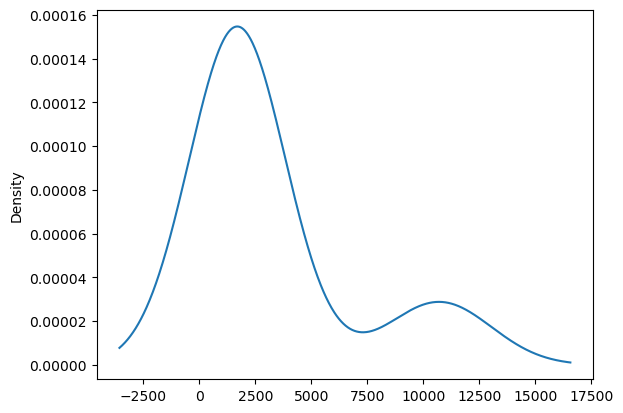

In [18]:
# Visualize the value counts of APPLICATION_TYPE

condition_count.plot.density()

In [19]:
byyear_nona_df.dtypes


Year                  object
ConditionGroup        object
AgeGroup              object
Deaths                object
Number of Mentions    object
dtype: object

In [20]:
byyear_nona_df = byyear_nona_df.loc[(byyear_nona_df['AgeGroup'] != "Not stated")]
byyear_nona_df

,Year,ConditionGroup,AgeGroup,Deaths,Number of Mentions
12420,"2,020",Respiratory diseases,0-24,249,256
12421,"2,021",Respiratory diseases,0-24,893,933
12422,"2,022",Respiratory diseases,0-24,350,372
12423,"2,023",Respiratory diseases,0-24,9,10
12424,"2,020",Respiratory diseases,25-34,"1,112","1,131"
...,...,...,...,...,...
62091,"2,023",COVID-19,85+,91,91
62096,"2,020",COVID-19,All Ages,"1,629","1,629"
62097,"2,021",COVID-19,All Ages,"1,645","1,645"
62098,"2,022",COVID-19,All Ages,"2,346","2,346"


In [21]:
agegrp_count = byyear_nona_df.AgeGroup.value_counts()
agegrp_count


All Ages    4588
75-84       4175
85+         4131
65-74       3985
55-64       3634
45-54       3502
0-24        3252
35-44       3180
25-34       3045
Name: AgeGroup, dtype: int64

In [22]:
byyear_nona_df = byyear_nona_df.loc[(byyear_nona_df['AgeGroup']!= "All Ages")]
byyear_nona_df

,Year,ConditionGroup,AgeGroup,Deaths,Number of Mentions
12420,"2,020",Respiratory diseases,0-24,249,256
12421,"2,021",Respiratory diseases,0-24,893,933
12422,"2,022",Respiratory diseases,0-24,350,372
12423,"2,023",Respiratory diseases,0-24,9,10
12424,"2,020",Respiratory diseases,25-34,"1,112","1,131"
...,...,...,...,...,...
62087,"2,023",COVID-19,75-84,47,47
62088,"2,020",COVID-19,85+,333,333
62089,"2,021",COVID-19,85+,267,267
62090,"2,022",COVID-19,85+,882,882


In [23]:
byyear_nona_df.dtypes

Year                  object
ConditionGroup        object
AgeGroup              object
Deaths                object
Number of Mentions    object
dtype: object

In [24]:
byyear_nona_df.isna().sum()

Year                  0
ConditionGroup        0
AgeGroup              0
Deaths                0
Number of Mentions    0
dtype: int64

In [25]:
import numpy as np
byyear_nona_df['Deaths'] = byyear_nona_df['Deaths'].str.replace(',','').astype(int)

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
byyear_nona_df.dtypes


Year                  object
ConditionGroup        object
AgeGroup              object
Deaths                 int32
Number of Mentions    object
dtype: object

In [27]:
byyear_nona_df = byyear_nona_df.drop('Number of Mentions',axis=1)
byyear_nona_df

,Year,ConditionGroup,AgeGroup,Deaths
12420,"2,020",Respiratory diseases,0-24,249
12421,"2,021",Respiratory diseases,0-24,893
12422,"2,022",Respiratory diseases,0-24,350
12423,"2,023",Respiratory diseases,0-24,9
12424,"2,020",Respiratory diseases,25-34,1112
...,...,...,...,...
62087,"2,023",COVID-19,75-84,47
62088,"2,020",COVID-19,85+,333
62089,"2,021",COVID-19,85+,267
62090,"2,022",COVID-19,85+,882


In [28]:
byyear_nona_df.nunique()

Year                 4
ConditionGroup      12
AgeGroup             8
Deaths            1949
dtype: int64

In [29]:
# Generate our categorical variable lists

covid_cat = byyear_nona_df.dtypes[byyear_nona_df.dtypes == "object"].index.tolist()
covid_cat

['Year', 'ConditionGroup', 'AgeGroup']

In [30]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(byyear_nona_df[covid_cat]))

In [31]:
encode_df 

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28900,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28901,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28902,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(covid_cat)
encode_df

C:\Users\Admin\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",ConditionGroup_All other conditions and causes (residual),ConditionGroup_Alzheimer disease,ConditionGroup_COVID-19,ConditionGroup_Circulatory diseases,ConditionGroup_Diabetes,"ConditionGroup_Intentional and unintentional injury, poisoning, and other adverse events",...,ConditionGroup_Sepsis,ConditionGroup_Vascular and unspecified dementia,AgeGroup_0-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65-74,AgeGroup_75-84,AgeGroup_85+
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28900,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28901,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28902,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
byyear_nona_df = byyear_nona_df.reset_index(drop=True)
byyear_nona_df

,Year,ConditionGroup,AgeGroup,Deaths
0,"2,020",Respiratory diseases,0-24,249
1,"2,021",Respiratory diseases,0-24,893
2,"2,022",Respiratory diseases,0-24,350
3,"2,023",Respiratory diseases,0-24,9
4,"2,020",Respiratory diseases,25-34,1112
...,...,...,...,...
28899,"2,023",COVID-19,75-84,47
28900,"2,020",COVID-19,85+,333
28901,"2,021",COVID-19,85+,267
28902,"2,022",COVID-19,85+,882


In [34]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(byyear_nona_df[covid_cat]))

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names(covid_cat)
# encode_df.head()

In [35]:
byyear_nona_df = byyear_nona_df.merge(encode_df,left_index=True, right_index=True)
byyear_nona_df

,Year,ConditionGroup,AgeGroup,Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",ConditionGroup_All other conditions and causes (residual),ConditionGroup_Alzheimer disease,...,ConditionGroup_Sepsis,ConditionGroup_Vascular and unspecified dementia,AgeGroup_0-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65-74,AgeGroup_75-84,AgeGroup_85+
0,"2,020",Respiratory diseases,0-24,249,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"2,021",Respiratory diseases,0-24,893,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"2,022",Respiratory diseases,0-24,350,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"2,023",Respiratory diseases,0-24,9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"2,020",Respiratory diseases,25-34,1112,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,"2,023",COVID-19,75-84,47,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28900,"2,020",COVID-19,85+,333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28901,"2,021",COVID-19,85+,267,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28902,"2,022",COVID-19,85+,882,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
covid_cat

['Year', 'ConditionGroup', 'AgeGroup']

In [37]:
byyear_nona_df = byyear_nona_df.drop(covid_cat, axis=1)
byyear_nona_df

,Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",ConditionGroup_All other conditions and causes (residual),ConditionGroup_Alzheimer disease,ConditionGroup_COVID-19,ConditionGroup_Circulatory diseases,ConditionGroup_Diabetes,...,ConditionGroup_Sepsis,ConditionGroup_Vascular and unspecified dementia,AgeGroup_0-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65-74,AgeGroup_75-84,AgeGroup_85+
0,249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,893,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28899,47,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28900,333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28901,267,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28902,882,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
byyear_nona_df.dtypes

Deaths                                                                                        int32
Year_2,020                                                                                  float64
Year_2,021                                                                                  float64
Year_2,022                                                                                  float64
Year_2,023                                                                                  float64
ConditionGroup_All other conditions and causes (residual)                                   float64
ConditionGroup_Alzheimer disease                                                            float64
ConditionGroup_COVID-19                                                                     float64
ConditionGroup_Circulatory diseases                                                         float64
ConditionGroup_Diabetes                                                                     float64


In [39]:
# byyear_nona_df.rename(columns = {'COVID-19_Deaths':'Deaths'}, inplace = True)
byyear_nona_df.columns

Index(['Deaths', 'Year_2,020', 'Year_2,021', 'Year_2,022', 'Year_2,023',
       'ConditionGroup_All other conditions and causes (residual)',
       'ConditionGroup_Alzheimer disease', 'ConditionGroup_COVID-19',
       'ConditionGroup_Circulatory diseases', 'ConditionGroup_Diabetes',
       'ConditionGroup_Intentional and unintentional injury, poisoning, and other adverse events',
       'ConditionGroup_Malignant neoplasms', 'ConditionGroup_Obesity',
       'ConditionGroup_Renal failure', 'ConditionGroup_Respiratory diseases',
       'ConditionGroup_Sepsis',
       'ConditionGroup_Vascular and unspecified dementia', 'AgeGroup_0-24',
       'AgeGroup_25-34', 'AgeGroup_35-44', 'AgeGroup_45-54', 'AgeGroup_55-64',
       'AgeGroup_65-74', 'AgeGroup_75-84', 'AgeGroup_85+'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

# Split our preprocessed data into our features and target arrays
# use R

y = byyear_nona_df.Deaths.values
X = byyear_nona_df.drop(columns=["Deaths"]).values



In [41]:
y

array([249, 893, 350, ..., 267, 882,  91])

In [43]:
from sklearn.linear_model import LogisticRegression


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [44]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
X_train_scaled

array([[ 1.72346444, -0.60588233, -0.57660454, ..., -0.40286093,
        -0.41048673, -0.40833617],
       [-0.58022665,  1.6504855 , -0.57660454, ..., -0.40286093,
         2.43613236, -0.40833617],
       [ 1.72346444, -0.60588233, -0.57660454, ..., -0.40286093,
        -0.41048673, -0.40833617],
       ...,
       [ 1.72346444, -0.60588233, -0.57660454, ..., -0.40286093,
        -0.41048673, -0.40833617],
       [-0.58022665,  1.6504855 , -0.57660454, ..., -0.40286093,
        -0.41048673, -0.40833617],
       [ 1.72346444, -0.60588233, -0.57660454, ..., -0.40286093,
        -0.41048673, -0.40833617]])

In [47]:
# define the model - deep neural net

number_input_features = len(X_train[0])

hidden_nodes_layer1=8

hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

#first hidden layer

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

#second hidden layer

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))

# output layer

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# check the structure of the model

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [50]:

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# train the model

fit_model = nn.fit(X_train, y_train, epochs=25)

Epoch 1/25
678/678 [==============================] - 1s 839us/step - loss: -977.8533 - accuracy: 0.0330
Epoch 2/25
678/678 [==============================] - 1s 826us/step - loss: -10991.8701 - accuracy: 2.7678e-04
Epoch 3/25
678/678 [==============================] - 1s 799us/step - loss: -46828.9570 - accuracy: 2.7678e-04
Epoch 4/25
678/678 [==============================] - 1s 830us/step - loss: -120252.7500 - accuracy: 2.7678e-04
Epoch 5/25
678/678 [==============================] - 1s 820us/step - loss: -233934.8750 - accuracy: 2.7678e-04
Epoch 6/25
678/678 [==============================] - 1s 826us/step - loss: -388030.7500 - accuracy: 2.7678e-04
Epoch 7/25
678/678 [==============================] - 1s 815us/step - loss: -583230.6250 - accuracy: 2.7678e-04
Epoch 8/25
678/678 [==============================] - 1s 860us/step - loss: -826258.4375 - accuracy: 2.7678e-04
Epoch 9/25
678/678 [==============================] - 1s 870us/step - loss: -1128293.8750 - accuracy: 2.7678e-04


In [52]:
# evalute the model using the test data

model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss : {model_loss}, Accuracy : {model_accuracy}")

226/226 - 0s - loss: -1.3446e+07 - accuracy: 9.6872e-04 - 230ms/epoch - 1ms/step
Loss : -13446201.0, Accuracy : 0.0009687240235507488


In [54]:
#Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model

fit_model = nn.fit(X_train, y_train, epochs=25)

# Restore the model weights
# nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/25
678/678 [==============================] - 1s 811us/step - loss: -17549886.0000 - accuracy: 2.7678e-04
Epoch 2/25
678/678 [==============================] - 1s 832us/step - loss: -19370212.0000 - accuracy: 2.7678e-04
Epoch 3/25
678/678 [==============================] - 1s 859us/step - loss: -21302124.0000 - accuracy: 2.7678e-04
Epoch 4/25
678/678 [==============================] - 1s 876us/step - loss: -23355772.0000 - accuracy: 2.7678e-04
Epoch 5/25
678/678 [==============================] - 1s 824us/step - loss: -25576716.0000 - accuracy: 2.7678e-04
Epoch 6/25
678/678 [==============================] - 1s 840us/step - loss: -27907806.0000 - accuracy: 2.7678e-04
Epoch 7/25
678/678 [==============================] - 1s 864us/step - loss: -30311346.0000 - accuracy: 2.7678e-04
Epoch 8/25
678/678 [==============================] - 1s 829us/step - loss: -32916672.0000 - accuracy: 2.7678e-04
Epoch 9/25
678/678 [==============================] - 1s 840us/step - loss: -35677672.00

In [41]:
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [42]:
y_train

array([  16,   36,  270, ..., 2485,   66,    0])

In [43]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model - Optimize Trial - 1

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.301


In [45]:
len(X_train[0])

24

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])

hidden_nodes_layer1=8

# hidden_nodes_layer2 = 6

# hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))

# Thired hidden layer
#  YOUR CODE GOES HERE

# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [47]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
# os.makedirs("checkpoints/",exist_ok=True)
# checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [48]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Create a callback that saves the model's weights every epoch
# cp_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     verbose=1,
#     save_weights_only=True,
#     save_freq= "epoch",
#     period=5
#     )




In [49]:
# Train the model
#  YOUR CODE GOES HERE

# fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

fit_model = nn.fit(X_train, y_train, epochs=25)

Epoch 1/25
678/678 [==============================] - 1s 783us/step - loss: -1274.2423 - accuracy: 0.0048
Epoch 2/25
678/678 [==============================] - 1s 795us/step - loss: -6075.8638 - accuracy: 2.7678e-04
Epoch 3/25
678/678 [==============================] - 1s 785us/step - loss: -14209.6045 - accuracy: 2.7678e-04
Epoch 4/25
678/678 [==============================] - 1s 813us/step - loss: -25502.0195 - accuracy: 2.7678e-04
Epoch 5/25
678/678 [==============================] - 1s 804us/step - loss: -39632.0156 - accuracy: 2.7678e-04
Epoch 6/25
678/678 [==============================] - 1s 805us/step - loss: -56365.2461 - accuracy: 2.7678e-04
Epoch 7/25
678/678 [==============================] - 1s 825us/step - loss: -75111.5078 - accuracy: 2.7678e-04
Epoch 8/25
678/678 [==============================] - 1s 792us/step - loss: -95631.8516 - accuracy: 2.7678e-04
Epoch 9/25
678/678 [==============================] - 1s 765us/step - loss: -118554.1797 - accuracy: 2.7678e-04
Epoch 

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

226/226 - 0s - loss: -2.5642e+05 - accuracy: 0.0066 - 221ms/epoch - 980us/step
Loss: -256415.03125, Accuracy: 0.006642679218202829


In [66]:
# Export our model to HDF5 file
# nn.save("AlphabetSoupCharity_Optimization.h5")

# Optimize trial # 2

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])

hidden_nodes_layer1=80

hidden_nodes_layer2 = 60

# hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="tanh"))

# Thired hidden layer
#  YOUR CODE GOES HERE

# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="tanh"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 80)                2000      
                                                                 
 dense_3 (Dense)             (None, 60)                4860      
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
Total params: 6,921
Trainable params: 6,921
Non-trainable params: 0
_________________________________________________________________


In [52]:
# create checkpoint

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [53]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model
#  YOUR CODE GOES HERE

# fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

fit_model = nn.fit(X_train, y_train, epochs=25)

Epoch 1/25
678/678 [==============================] - 1s 877us/step - loss: -6951.0488 - accuracy: 0.0016
Epoch 2/25
678/678 [==============================] - 1s 870us/step - loss: -14721.1807 - accuracy: 2.7678e-04
Epoch 3/25
678/678 [==============================] - 1s 928us/step - loss: -22248.5566 - accuracy: 2.7678e-04
Epoch 4/25
678/678 [==============================] - 1s 957us/step - loss: -29809.9434 - accuracy: 2.7678e-04
Epoch 5/25
678/678 [==============================] - 1s 944us/step - loss: -37228.7227 - accuracy: 2.7678e-04
Epoch 6/25
678/678 [==============================] - 1s 977us/step - loss: -44531.7422 - accuracy: 2.7678e-04
Epoch 7/25
678/678 [==============================] - 1s 988us/step - loss: -51887.7812 - accuracy: 2.7678e-04
Epoch 8/25
678/678 [==============================] - 1s 964us/step - loss: -59211.6133 - accuracy: 2.7678e-04
Epoch 9/25
678/678 [==============================] - 1s 995us/step - loss: -66528.6328 - accuracy: 2.7678e-04
Epoch 

In [55]:
# Evaluate the model using the test data ACTIVATION "tanh"
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

226/226 - 0s - loss: -1.3609e+05 - accuracy: 9.6872e-04 - 213ms/epoch - 941us/step
Loss: -136086.640625, Accuracy: 0.0009687240235507488


#  Optimize Trial - 3

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])

hidden_nodes_layer1=50

hidden_nodes_layer2 = 40

hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="sigmoid"))

# Thired hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, input_dim=number_input_features, activation="sigmoid"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1250      
                                                                 
 dense_6 (Dense)             (None, 40)                2040      
                                                                 
 dense_7 (Dense)             (None, 30)                1230      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,551
Trainable params: 4,551
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Train the model
#  YOUR CODE GOES HERE

# fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

fit_model = nn.fit(X_train, y_train, epochs=25)

Epoch 1/25
678/678 [==============================] - 1s 920us/step - loss: -2603.9893 - accuracy: 2.7678e-04
Epoch 2/25
678/678 [==============================] - 1s 890us/step - loss: -5332.1514 - accuracy: 2.7678e-04
Epoch 3/25
678/678 [==============================] - 1s 909us/step - loss: -7937.3096 - accuracy: 2.7678e-04
Epoch 4/25
678/678 [==============================] - 1s 944us/step - loss: -10618.3789 - accuracy: 2.7678e-04
Epoch 5/25
678/678 [==============================] - 1s 957us/step - loss: -13290.7998 - accuracy: 2.7678e-04
Epoch 6/25
678/678 [==============================] - 1s 901us/step - loss: -15923.3926 - accuracy: 2.7678e-04
Epoch 7/25
678/678 [==============================] - 1s 930us/step - loss: -18542.1289 - accuracy: 2.7678e-04
Epoch 8/25
678/678 [==============================] - 1s 888us/step - loss: -21162.3105 - accuracy: 2.7678e-04
Epoch 9/25
678/678 [==============================] - 1s 955us/step - loss: -23794.1621 - accuracy: 2.7678e-04
Epoc

In [59]:
# Evaluate the model using the test data ACTIVATION "sigmoid"
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

226/226 - 0s - loss: -5.8916e+04 - accuracy: 9.6872e-04 - 213ms/epoch - 943us/step
Loss: -58916.24609375, Accuracy: 0.0009687240235507488


# Optimize Trial# 

In [60]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=number_input_features))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
nn_model.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
678/678 [==============================] - 1s 775us/step - loss: -485.8365 - accuracy: 0.1604
Epoch 2/25
678/678 [==============================] - 1s 809us/step - loss: -3484.2698 - accuracy: 0.1000
Epoch 3/25
678/678 [==============================] - 1s 806us/step - loss: -9670.0342 - accuracy: 0.0371
Epoch 4/25
678/678 [==============================] - 1s 809us/step - loss: -18448.7578 - accuracy: 0.0015
Epoch 5/25
678/678 [==============================] - 1s 809us/step - loss: -30023.1973 - accuracy: 2.7678e-04
Epoch 6/25
678/678 [==============================] - 1s 801us/step - loss: -44652.0586 - accuracy: 2.7678e-04
Epoch 7/25
678/678 [==============================] - 1s 843us/step - loss: -62961.6641 - accuracy: 2.7678e-04
Epoch 8/25
678/678 [==============================] - 1s 843us/step - loss: -83931.5703 - accuracy: 2.7678e-04
Epoch 9/25
678/678 [==============================] - 1s 847us/step - loss: -109086.7188 - accuracy: 2.7678e-04
Epoch 10/25
678/678 

In [61]:
# Evaluate the model using the test data ACTIVATION "relu" + "sigmoid"
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

226/226 - 0s - loss: -5.8916e+04 - accuracy: 9.6872e-04 - 145ms/epoch - 640us/step
Loss: -58916.24609375, Accuracy: 0.0009687240235507488


# # SVM Deep Learning


In [62]:
from sklearn.svm import SVC


In [63]:
# Create the SVM model
svm = SVC(kernel='linear')

In [64]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.241
